# Problem Statement:
Pick up the following stocks and generate forecasts accordingly
Stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
%matplotlib inline
data = pd.read_csv('C:/Users/shrqfrhn/Downloads/data_stocks.csv')
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [2]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [4]:
data.isnull().values.any()

False

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], unit='ms')

In [6]:
data.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1970-01-18 06:13:46.200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1970-01-18 06:13:46.260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1970-01-18 06:13:46.320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1970-01-18 06:13:46.380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1970-01-18 06:13:46.440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


# 2. NASDAQ.ADP

In [7]:
df_ADP = pd.DataFrame(data['NASDAQ.ADP'])
df_ADP.set_index(data['DATE'], inplace=True)
df_ADP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41266 entries, 1970-01-18 06:13:46.200000 to 1970-01-18 09:50:09.600000
Data columns (total 1 columns):
NASDAQ.ADP    41266 non-null float64
dtypes: float64(1)
memory usage: 644.8 KB


In [8]:
df_ADP.head(5)

,NASDAQ.ADP
DATE,
1970-01-18 06:13:46.200,102.2300
1970-01-18 06:13:46.260,102.1400
1970-01-18 06:13:46.320,102.2125
1970-01-18 06:13:46.380,102.1400
1970-01-18 06:13:46.440,102.0600


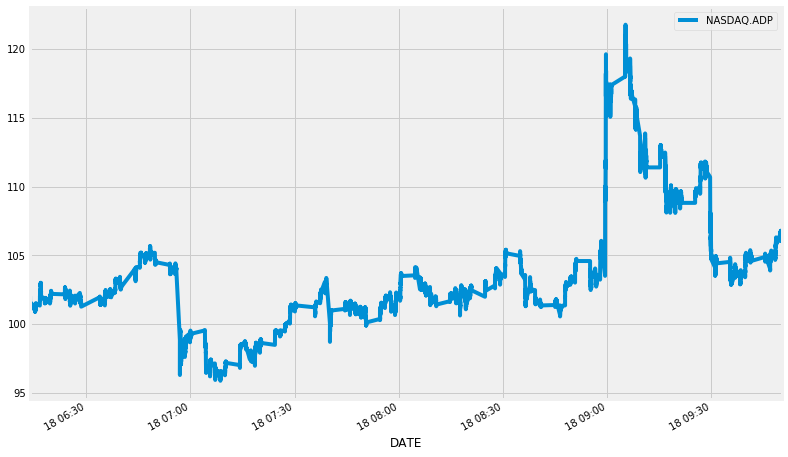

In [9]:
df_ADP.plot(figsize=(12,8))

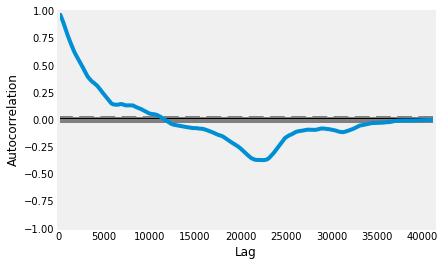

In [10]:
# Create an autocorrelation plot. 
autocorrelation_plot(df_ADP)
plt.show()

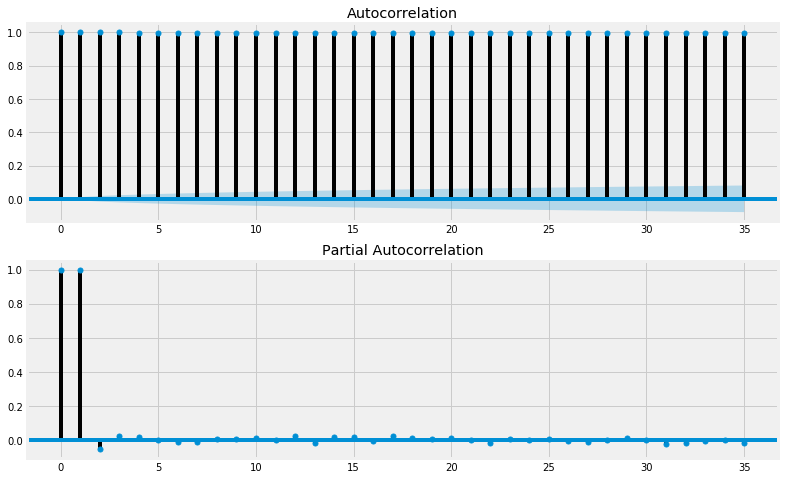

In [11]:
# Create ACF (Auto correlation) and PACF (partial Auto correlation) plots. 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ADP.values.squeeze(), lags=35, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ADP, method='ywmle', lags=35, ax=ax2)

In [12]:
model = ARIMA(df_ADP, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.NASDAQ.ADP   No. Observations:                41265
Model:                 ARIMA(5, 1, 0)   Log Likelihood               48794.235
Method:                       css-mle   S.D. of innovations              0.074
Date:                Thu, 21 Feb 2019   AIC                         -97574.470
Time:                        01:26:46   BIC                         -97514.076
Sample:                             1   HQIC                        -97555.381
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0001      0.000      0.272      0.785      -0.001       0.001
ar.L1.D.NASDAQ.ADP     0.0581      0.005     11.794      0.000       0.048       0.068
ar.L2.D.NASDAQ.ADP  

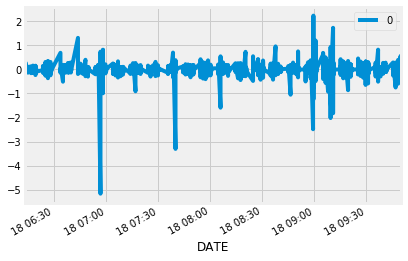

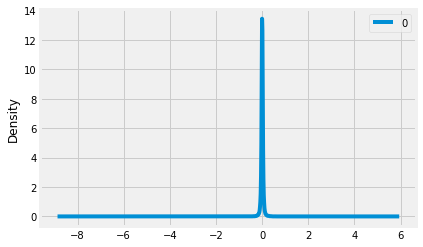

                  0
count  4.126500e+04
mean   1.462417e-07
std    7.417064e-02
min   -5.167771e+00
25%   -1.944323e-02
50%    7.823540e-05
75%    1.992543e-02
max    2.236279e+00


In [13]:
# Plot the residuals of the model. 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [14]:
# Test the model with train and test data 
size=int(len(df_ADP)*0.7)
train, test = df_ADP.values[0:size], df_ADP.values[size:len(df_ADP)]
len(train), len(test)

(28886, 12380)

In [15]:
# Create train list and empty list to store the predictions 
X=list(train)
predictions=[]
for t in range (len(test)):
    model = ARIMA(X, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    X.append(test[t])
    print('%d. predicted=%f, expected=%f' % (len(predictions), yhat, test[t]))

1. predicted=102.671912, expected=102.670000
2. predicted=102.669292, expected=102.685000
3. predicted=102.685734, expected=102.670000
4. predicted=102.667823, expected=102.670000
5. predicted=102.669687, expected=102.680000
6. predicted=102.681236, expected=102.710000
7. predicted=102.712951, expected=102.680000
8. predicted=102.676290, expected=102.675000
9. predicted=102.674203, expected=102.670000
10. predicted=102.669829, expected=102.770000
11. predicted=102.780620, expected=102.817800
12. predicted=102.821507, expected=102.870000
13. predicted=102.872295, expected=102.880000
14. predicted=102.877835, expected=102.850000
15. predicted=102.843688, expected=102.850000
16. predicted=102.849129, expected=102.870000
17. predicted=102.872076, expected=102.880000
18. predicted=102.880934, expected=102.880000
19. predicted=102.879719, expected=102.870000
20. predicted=102.868503, expected=102.860000
21. predicted=102.858803, expected=102.880000
22. predicted=102.882404, expected=102.8750

178. predicted=102.770876, expected=102.740000
179. predicted=102.736719, expected=102.732000
180. predicted=102.731363, expected=102.740000
181. predicted=102.741717, expected=102.730000
182. predicted=102.729261, expected=102.750000
183. predicted=102.752539, expected=102.740000
184. predicted=102.738858, expected=102.720000
185. predicted=102.717657, expected=102.720000
186. predicted=102.720499, expected=102.730000
187. predicted=102.731418, expected=102.720000
188. predicted=102.719152, expected=102.720000
189. predicted=102.720194, expected=102.710000
190. predicted=102.709098, expected=102.690000
191. predicted=102.688113, expected=102.660000
192. predicted=102.657613, expected=102.655000
193. predicted=102.655634, expected=102.650000
194. predicted=102.650662, expected=102.640000
195. predicted=102.639778, expected=102.725000
196. predicted=102.734579, expected=102.670000
197. predicted=102.663125, expected=102.701200
198. predicted=102.703579, expected=102.670000
199. predicte

353. predicted=103.202408, expected=103.220000
354. predicted=103.224080, expected=103.260000
355. predicted=103.264181, expected=103.340000
356. predicted=103.347854, expected=103.340000
357. predicted=103.337302, expected=103.270000
358. predicted=103.260131, expected=103.220000
359. predicted=103.214668, expected=103.210000
360. predicted=103.210633, expected=103.180000
361. predicted=103.179127, expected=103.170000
362. predicted=103.171180, expected=103.120000
363. predicted=103.116439, expected=103.070000
364. predicted=103.066433, expected=103.070000
365. predicted=103.072588, expected=103.060000
366. predicted=103.060899, expected=103.120000
367. predicted=103.127617, expected=103.210000
368. predicted=103.219148, expected=103.230000
369. predicted=103.229186, expected=103.050000
370. predicted=103.028191, expected=103.090000
371. predicted=103.095150, expected=103.100000
372. predicted=103.103401, expected=103.100000
373. predicted=103.100778, expected=103.170000
374. predicte

528. predicted=103.179659, expected=103.180000
529. predicted=103.179780, expected=103.170000
530. predicted=103.168527, expected=103.160000
531. predicted=103.159171, expected=103.150000
532. predicted=103.149412, expected=103.160000
533. predicted=103.161609, expected=103.155000
534. predicted=103.154811, expected=103.150000
535. predicted=103.149597, expected=103.160000
536. predicted=103.161274, expected=103.160000
537. predicted=103.159916, expected=103.150000
538. predicted=103.148870, expected=103.155000
539. predicted=103.155665, expected=103.140000
540. predicted=103.138507, expected=103.130000
541. predicted=103.129260, expected=103.100000
542. predicted=103.097510, expected=103.070000
543. predicted=103.067814, expected=103.090000
544. predicted=103.093659, expected=103.080000
545. predicted=103.079834, expected=103.090000
546. predicted=103.091476, expected=103.130000
547. predicted=103.134351, expected=103.161500
548. predicted=103.163732, expected=103.170000
549. predicte

703. predicted=104.043725, expected=103.985000
704. predicted=103.976895, expected=103.960000
705. predicted=103.957311, expected=103.980000
706. predicted=103.982731, expected=103.810000
707. predicted=103.793413, expected=103.840000
708. predicted=103.846727, expected=103.900000
709. predicted=103.909338, expected=103.920000
710. predicted=103.922344, expected=103.890000
711. predicted=103.886683, expected=103.880000
712. predicted=103.878046, expected=103.900000
713. predicted=103.902038, expected=103.880000
714. predicted=103.878077, expected=103.920000
715. predicted=103.924462, expected=103.880000
716. predicted=103.875554, expected=103.820000
717. predicted=103.813922, expected=103.825000
718. predicted=103.827258, expected=103.810000
719. predicted=103.809911, expected=103.860000
720. predicted=103.866485, expected=103.830000
721. predicted=103.826980, expected=103.880000
722. predicted=103.884681, expected=103.850000
723. predicted=103.846251, expected=103.850000
724. predicte

878. predicted=104.405646, expected=104.410000
879. predicted=104.409956, expected=104.410000
880. predicted=104.410681, expected=104.440000
881. predicted=104.443283, expected=104.350000
882. predicted=104.340902, expected=104.345000
883. predicted=104.345582, expected=104.370000
884. predicted=104.374297, expected=104.400000
885. predicted=104.403570, expected=104.390000
886. predicted=104.388983, expected=104.420000
887. predicted=104.422329, expected=104.430000
888. predicted=104.430075, expected=104.420000
889. predicted=104.418011, expected=104.400000
890. predicted=104.397745, expected=104.455000
891. predicted=104.460737, expected=104.500000
892. predicted=104.504028, expected=104.510000
893. predicted=104.509369, expected=104.520000
894. predicted=104.519387, expected=104.450000
895. predicted=104.441448, expected=104.460000
896. predicted=104.461548, expected=104.420000
897. predicted=104.417198, expected=104.400000
898. predicted=104.399389, expected=104.390000
899. predicte

1052. predicted=103.672252, expected=103.530000
1053. predicted=103.516724, expected=103.465000
1054. predicted=103.462495, expected=103.560000
1055. predicted=103.573254, expected=103.570000
1056. predicted=103.572598, expected=103.640000
1057. predicted=103.647106, expected=103.660000
1058. predicted=103.660063, expected=103.620000
1059. predicted=103.612970, expected=103.600000
1060. predicted=103.597382, expected=103.590000
1061. predicted=103.589292, expected=103.520000
1062. predicted=103.513912, expected=103.510000
1063. predicted=103.511249, expected=103.410000
1064. predicted=103.402054, expected=103.440000
1065. predicted=103.446107, expected=103.540000
1066. predicted=103.552595, expected=103.570000
1067. predicted=103.571859, expected=103.625000
1068. predicted=103.628525, expected=103.700000
1069. predicted=103.704336, expected=103.670000
1070. predicted=103.662961, expected=103.610000
1071. predicted=103.601926, expected=103.670000
1072. predicted=103.676329, expected=103

1223. predicted=102.510815, expected=102.580000
1224. predicted=102.586506, expected=102.650000
1225. predicted=102.655470, expected=102.670000
1226. predicted=102.668787, expected=102.680000
1227. predicted=102.678263, expected=102.600000
1228. predicted=102.589746, expected=102.600000
1229. predicted=102.600237, expected=102.660000
1230. predicted=102.667419, expected=102.680000
1231. predicted=102.681811, expected=102.725000
1232. predicted=102.728722, expected=102.750000
1233. predicted=102.750516, expected=102.760000
1234. predicted=102.758683, expected=102.710000
1235. predicted=102.703501, expected=102.740000
1236. predicted=102.742912, expected=102.735000
1237. predicted=102.734659, expected=102.800000
1238. predicted=102.806480, expected=102.795000
1239. predicted=102.793614, expected=102.850000
1240. predicted=102.853936, expected=102.810000
1241. predicted=102.804371, expected=102.820000
1242. predicted=102.819897, expected=102.815000
1243. predicted=102.814580, expected=102

1394. predicted=102.739523, expected=102.770000
1395. predicted=102.773114, expected=102.800000
1396. predicted=102.802119, expected=102.785000
1397. predicted=102.782100, expected=102.880000
1398. predicted=102.888776, expected=102.881000
1399. predicted=102.879024, expected=102.855000
1400. predicted=102.850194, expected=102.920000
1401. predicted=102.925958, expected=102.890000
1402. predicted=102.885358, expected=102.900000
1403. predicted=102.900470, expected=102.890000
1404. predicted=102.888961, expected=102.944400
1405. predicted=102.949495, expected=102.930000
1406. predicted=102.928015, expected=102.905000
1407. predicted=102.901617, expected=102.980000
1408. predicted=102.987722, expected=103.015000
1409. predicted=103.017292, expected=103.050000
1410. predicted=103.051734, expected=103.050000
1411. predicted=103.047972, expected=103.120000
1412. predicted=103.125023, expected=103.150000
1413. predicted=103.150949, expected=103.210000
1414. predicted=103.213597, expected=103

1565. predicted=103.400453, expected=103.390000
1566. predicted=103.390894, expected=103.550000
1567. predicted=103.567304, expected=103.550000
1568. predicted=103.548189, expected=103.530000
1569. predicted=103.524695, expected=103.520000
1570. predicted=103.517624, expected=103.510000
1571. predicted=103.507973, expected=103.490000
1572. predicted=103.488683, expected=103.510000
1573. predicted=103.512941, expected=103.560000
1574. predicted=103.565340, expected=103.560000
1575. predicted=103.559050, expected=103.550000
1576. predicted=103.547904, expected=103.530000
1577. predicted=103.527424, expected=103.520000
1578. predicted=103.519091, expected=103.550000
1579. predicted=103.553773, expected=103.555000
1580. predicted=103.555573, expected=103.536300
1581. predicted=103.534048, expected=103.530000
1582. predicted=103.529386, expected=103.540000
1583. predicted=103.541191, expected=103.510000
1584. predicted=103.507182, expected=103.515000
1585. predicted=103.516120, expected=103

1736. predicted=102.829647, expected=102.850000
1737. predicted=102.852853, expected=102.855900
1738. predicted=102.856690, expected=102.850000
1739. predicted=102.848944, expected=102.890000
1740. predicted=102.893845, expected=102.895000
1741. predicted=102.894661, expected=102.895000
1742. predicted=102.894044, expected=102.870000
1743. predicted=102.867019, expected=102.850000
1744. predicted=102.847990, expected=102.860000
1745. predicted=102.861874, expected=102.805000
1746. predicted=102.800109, expected=102.805000
1747. predicted=102.806265, expected=102.820000
1748. predicted=102.822835, expected=102.820000
1749. predicted=102.820287, expected=102.810000
1750. predicted=102.809272, expected=102.755000
1751. predicted=102.749548, expected=102.720000
1752. predicted=102.717571, expected=102.760000
1753. predicted=102.765961, expected=102.820000
1754. predicted=102.826809, expected=102.790000
1755. predicted=102.786063, expected=102.799900
1756. predicted=102.799998, expected=102

1907. predicted=105.081222, expected=105.130000
1908. predicted=105.134681, expected=105.190000
1909. predicted=105.194412, expected=105.110000
1910. predicted=105.099548, expected=105.040000
1911. predicted=105.032643, expected=105.060000
1912. predicted=105.063734, expected=105.010000
1913. predicted=105.006661, expected=104.930000
1914. predicted=104.924407, expected=104.995000
1915. predicted=105.004407, expected=105.110000
1916. predicted=105.122245, expected=105.250000
1917. predicted=105.261808, expected=105.260000
1918. predicted=105.256347, expected=105.290000
1919. predicted=105.287732, expected=105.260000
1920. predicted=105.253561, expected=105.320000
1921. predicted=105.324075, expected=105.350000
1922. predicted=105.352216, expected=105.140000
1923. predicted=105.117853, expected=105.190000
1924. predicted=105.197504, expected=105.100000
1925. predicted=105.094116, expected=105.059900
1926. predicted=105.058560, expected=105.080000
1927. predicted=105.086475, expected=105

2078. predicted=105.442244, expected=105.490000
2079. predicted=105.492097, expected=105.480000
2080. predicted=105.475639, expected=105.500900
2081. predicted=105.500977, expected=105.500000
2082. predicted=105.498776, expected=105.485000
2083. predicted=105.482766, expected=105.480000
2084. predicted=105.479763, expected=105.480000
2085. predicted=105.480297, expected=105.490000
2086. predicted=105.491358, expected=105.506800
2087. predicted=105.508581, expected=105.490000
2088. predicted=105.488028, expected=105.530000
2089. predicted=105.533771, expected=105.520000
2090. predicted=105.518538, expected=105.520000
2091. predicted=105.519390, expected=105.400000
2092. predicted=105.388445, expected=105.410000
2093. predicted=105.412744, expected=105.405000
2094. predicted=105.407218, expected=105.400000
2095. predicted=105.400821, expected=105.260000
2096. predicted=105.247956, expected=105.325000
2097. predicted=105.333770, expected=105.270000
2098. predicted=105.266921, expected=105

2249. predicted=108.597145, expected=108.620000
2250. predicted=108.620197, expected=108.660000
2251. predicted=108.661437, expected=108.960000
2252. predicted=108.981229, expected=108.995000
2253. predicted=108.988820, expected=108.960000
2254. predicted=108.950447, expected=109.000000
2255. predicted=109.000819, expected=108.930000
2256. predicted=108.922632, expected=109.140000
2257. predicted=109.157802, expected=109.210000
2258. predicted=109.210970, expected=109.300000
2259. predicted=109.301790, expected=109.335000
2260. predicted=109.332589, expected=109.680000
2261. predicted=109.702897, expected=109.545000
2262. predicted=109.523741, expected=109.680000
2263. predicted=109.687053, expected=109.960000
2264. predicted=109.977677, expected=109.760000
2265. predicted=109.734565, expected=109.715000
2266. predicted=109.711691, expected=109.725000
2267. predicted=109.727688, expected=109.730000
2268. predicted=109.731671, expected=110.000000
2269. predicted=110.021854, expected=109

2420. predicted=116.102311, expected=115.270000
2421. predicted=115.166460, expected=115.255000
2422. predicted=115.296452, expected=114.960000
2423. predicted=114.953038, expected=115.205000
2424. predicted=115.233332, expected=115.060000
2425. predicted=115.028885, expected=115.160000
2426. predicted=115.166648, expected=115.290000
2427. predicted=115.304290, expected=115.710000
2428. predicted=115.756997, expected=116.000000
2429. predicted=116.016452, expected=116.270000
2430. predicted=116.282733, expected=115.900000
2431. predicted=115.841112, expected=116.050000
2432. predicted=116.079447, expected=116.450000
2433. predicted=116.514276, expected=116.670100
2434. predicted=116.681430, expected=116.970000
2435. predicted=116.980991, expected=117.100000
2436. predicted=117.105162, expected=117.460000
2437. predicted=117.499927, expected=117.570000
2438. predicted=117.575280, expected=117.770000
2439. predicted=117.786581, expected=118.220000
2440. predicted=118.272689, expected=118

2591. predicted=116.619465, expected=116.340000
2592. predicted=116.312328, expected=116.330000
2593. predicted=116.337571, expected=116.140000
2594. predicted=116.122808, expected=116.040000
2595. predicted=116.030054, expected=116.140000
2596. predicted=116.154021, expected=115.950000
2597. predicted=115.928438, expected=115.670000
2598. predicted=115.635643, expected=115.660000
2599. predicted=115.667499, expected=115.510000
2600. predicted=115.500847, expected=115.640000
2601. predicted=115.654642, expected=115.140100
2602. predicted=115.079670, expected=115.140000
2603. predicted=115.144905, expected=115.470000
2604. predicted=115.518324, expected=115.560000
2605. predicted=115.565389, expected=115.630000
2606. predicted=115.620955, expected=115.240000
2607. predicted=115.192889, expected=116.020000
2608. predicted=116.119675, expected=117.280000
2609. predicted=117.425907, expected=117.300000
2610. predicted=117.257064, expected=116.770000
2611. predicted=116.672567, expected=116

2762. predicted=116.934987, expected=116.800000
2763. predicted=116.787832, expected=116.880000
2764. predicted=116.885096, expected=116.930000
2765. predicted=116.938208, expected=116.960000
2766. predicted=116.961608, expected=116.920000
2767. predicted=116.912949, expected=116.790000
2768. predicted=116.777469, expected=116.780000
2769. predicted=116.784520, expected=116.750000
2770. predicted=116.751007, expected=116.800000
2771. predicted=116.804885, expected=116.800000
2772. predicted=116.797980, expected=116.910000
2773. predicted=116.921000, expected=116.940000
2774. predicted=116.941517, expected=116.990000
2775. predicted=116.993037, expected=116.983800
2776. predicted=116.982851, expected=117.120000
2777. predicted=117.136768, expected=117.100000
2778. predicted=117.096374, expected=117.110000
2779. predicted=117.108740, expected=117.085000
2780. predicted=117.084499, expected=117.095000
2781. predicted=117.098741, expected=117.020000
2782. predicted=117.012179, expected=117

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2924. predicted=116.819032, expected=116.840000
2925. predicted=116.842478, expected=116.848800
2926. predicted=116.849142, expected=116.920000
2927. predicted=116.927734, expected=116.790000
2928. predicted=116.773957, expected=116.760000
2929. predicted=116.758363, expected=116.840000
2930. predicted=116.854572, expected=116.880000
2931. predicted=116.883609, expected=116.770000
2932. predicted=116.752655, expected=116.780000
2933. predicted=116.783311, expected=116.770000
2934. predicted=116.773802, expected=116.725000
2935. predicted=116.719707, expected=116.730000
2936. predicted=116.730676, expected=116.750000
2937. predicted=116.753830, expected=116.750000
2938. predicted=116.749175, expected=116.753100
2939. predicted=116.752674, expected=116.820000
2940. predicted=116.828137, expected=116.880000
2941. predicted=116.885868, expected=116.810000
2942. predicted=116.799428, expected=116.850000
2943. predicted=116.855590, expected=116.820000
2944. predicted=116.819803, expected=116

3095. predicted=120.066843, expected=120.175000
3096. predicted=120.185139, expected=120.150000
3097. predicted=120.141456, expected=120.230000
3098. predicted=120.236486, expected=120.260000
3099. predicted=120.264252, expected=120.300000
3100. predicted=120.303829, expected=120.450000
3101. predicted=120.465976, expected=120.480000
3102. predicted=120.481317, expected=120.675000
3103. predicted=120.693270, expected=120.800000
3104. predicted=120.811995, expected=120.820000
3105. predicted=120.817612, expected=120.810000
3106. predicted=120.808298, expected=120.765000
3107. predicted=120.765387, expected=120.690000
3108. predicted=120.686037, expected=120.910000
3109. predicted=120.938242, expected=120.850000
3110. predicted=120.840565, expected=120.760000
3111. predicted=120.743611, expected=120.885000
3112. predicted=120.904359, expected=120.920000
3113. predicted=120.927796, expected=121.330000
3114. predicted=121.369537, expected=121.080000
3115. predicted=121.042842, expected=121

3266. predicted=119.427389, expected=119.375000
3267. predicted=119.368905, expected=119.410000
3268. predicted=119.414801, expected=119.410000
3269. predicted=119.412138, expected=119.355000
3270. predicted=119.348789, expected=119.350000
3271. predicted=119.350447, expected=119.380000
3272. predicted=119.386150, expected=119.395000
3273. predicted=119.395960, expected=119.440000
3274. predicted=119.443039, expected=119.355000
3275. predicted=119.345126, expected=119.310000
3276. predicted=119.306833, expected=119.260000
3277. predicted=119.259182, expected=119.258800
3278. predicted=119.261288, expected=119.450000
3279. predicted=119.470469, expected=119.461800
3280. predicted=119.458164, expected=119.450000
3281. predicted=119.442509, expected=119.490000
3282. predicted=119.497161, expected=119.560000
3283. predicted=119.571895, expected=120.050000
3284. predicted=120.101830, expected=120.130000
3285. predicted=120.127738, expected=120.330000
3286. predicted=120.338948, expected=120

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3409. predicted=118.147274, expected=118.390000
3410. predicted=118.400589, expected=118.250000
3411. predicted=118.228521, expected=118.277900
3412. predicted=118.281549, expected=118.370000
3413. predicted=118.386968, expected=118.170000
3414. predicted=118.149250, expected=118.350000
3415. predicted=118.368697, expected=118.263500
3416. predicted=118.258510, expected=118.210000
3417. predicted=118.200708, expected=118.220000
3418. predicted=118.223000, expected=117.954200
3419. predicted=117.929936, expected=117.760000
3420. predicted=117.741722, expected=118.090000
3421. predicted=118.136679, expected=117.955000
3422. predicted=117.937063, expected=117.810000
3423. predicted=117.780440, expected=117.970000
3424. predicted=117.994090, expected=117.960000
3425. predicted=117.965431, expected=117.960000
3426. predicted=117.951851, expected=117.789900
3427. predicted=117.771029, expected=117.855000
3428. predicted=117.869056, expected=117.635000
3429. predicted=117.614928, expected=117

3580. predicted=116.932338, expected=116.970000
3581. predicted=116.975443, expected=116.980000
3582. predicted=116.979506, expected=116.860000
3583. predicted=116.845831, expected=116.770000
3584. predicted=116.763809, expected=116.850000
3585. predicted=116.865082, expected=116.870000
3586. predicted=116.872199, expected=116.900000
3587. predicted=116.897513, expected=116.890000
3588. predicted=116.887211, expected=116.890000
3589. predicted=116.891688, expected=116.960000
3590. predicted=116.968961, expected=116.944200
3591. predicted=116.941979, expected=116.950000
3592. predicted=116.949240, expected=116.890000
3593. predicted=116.885077, expected=116.950000
3594. predicted=116.959209, expected=116.940000
3595. predicted=116.939478, expected=116.890000
3596. predicted=116.883043, expected=116.860000
3597. predicted=116.857932, expected=116.831400
3598. predicted=116.831859, expected=116.850000
3599. predicted=116.853036, expected=116.865000
3600. predicted=116.866033, expected=116

3751. predicted=116.970466, expected=116.985000
3752. predicted=116.986268, expected=116.940000
3753. predicted=116.935076, expected=116.960000
3754. predicted=116.963264, expected=116.965000
3755. predicted=116.966934, expected=116.840000
3756. predicted=116.826185, expected=116.840000
3757. predicted=116.842101, expected=116.800000
3758. predicted=116.800000, expected=116.810000
3759. predicted=116.810990, expected=116.810000
3760. predicted=116.808690, expected=116.820000
3761. predicted=116.820755, expected=116.797500
3762. predicted=116.794573, expected=116.830000
3763. predicted=116.834277, expected=116.830000
3764. predicted=116.830471, expected=116.910000
3765. predicted=116.918040, expected=116.860000
3766. predicted=116.853331, expected=116.890000
3767. predicted=116.893124, expected=116.965000
3768. predicted=116.975088, expected=116.760000
3769. predicted=116.737256, expected=116.760000
3770. predicted=116.761825, expected=116.770000
3771. predicted=116.778498, expected=116

3922. predicted=114.678117, expected=114.710000
3923. predicted=114.716270, expected=114.708000
3924. predicted=114.702079, expected=114.830000
3925. predicted=114.839359, expected=114.852000
3926. predicted=114.852705, expected=114.930000
3927. predicted=114.935277, expected=114.820000
3928. predicted=114.808231, expected=114.910000
3929. predicted=114.922103, expected=114.890000
3930. predicted=114.891197, expected=114.870000
3931. predicted=114.866506, expected=114.720000
3932. predicted=114.704497, expected=114.800000
3933. predicted=114.813490, expected=114.700000
3934. predicted=114.692416, expected=114.740000
3935. predicted=114.741840, expected=114.670000
3936. predicted=114.663121, expected=114.670000
3937. predicted=114.670986, expected=114.680000
3938. predicted=114.681772, expected=114.580000
3939. predicted=114.569978, expected=114.550000
3940. predicted=114.547255, expected=114.490000
3941. predicted=114.487741, expected=114.460000
3942. predicted=114.458317, expected=114

4093. predicted=115.139136, expected=115.111000
4094. predicted=115.107040, expected=115.150000
4095. predicted=115.152212, expected=115.240000
4096. predicted=115.250503, expected=115.350000
4097. predicted=115.359913, expected=115.464600
4098. predicted=115.472056, expected=115.290000
4099. predicted=115.269202, expected=115.170000
4100. predicted=115.160871, expected=115.270000
4101. predicted=115.291376, expected=115.303700
4102. predicted=115.309871, expected=115.400000
4103. predicted=115.401551, expected=115.280000
4104. predicted=115.264000, expected=115.390900
4105. predicted=115.404220, expected=115.470000
4106. predicted=115.481819, expected=115.650000
4107. predicted=115.664715, expected=115.570000
4108. predicted=115.555433, expected=115.595000
4109. predicted=115.597135, expected=115.510000
4110. predicted=115.507414, expected=115.490000
4111. predicted=115.492007, expected=115.430000
4112. predicted=115.425755, expected=115.420000
4113. predicted=115.420569, expected=115

4264. predicted=112.100551, expected=112.070000
4265. predicted=112.066606, expected=111.870000
4266. predicted=111.849584, expected=112.020000
4267. predicted=112.045677, expected=112.000000
4268. predicted=111.999160, expected=112.020000
4269. predicted=112.015586, expected=112.000000
4270. predicted=111.996315, expected=111.950000
4271. predicted=111.946983, expected=111.860000
4272. predicted=111.852376, expected=111.870000
4273. predicted=111.876094, expected=111.850000
4274. predicted=111.849773, expected=111.640000
4275. predicted=111.615277, expected=111.550000
4276. predicted=111.546325, expected=111.470000
4277. predicted=111.471046, expected=111.690000
4278. predicted=111.717837, expected=111.270000
4279. predicted=111.214386, expected=111.530000
4280. predicted=111.562843, expected=111.230000
4281. predicted=111.204394, expected=111.266500
4282. predicted=111.270132, expected=111.380000
4283. predicted=111.397507, expected=111.710000
4284. predicted=111.742424, expected=111

4435. predicted=112.313542, expected=112.280000
4436. predicted=112.274782, expected=112.310000
4437. predicted=112.314142, expected=112.280000
4438. predicted=112.278376, expected=112.350000
4439. predicted=112.358039, expected=112.330000
4440. predicted=112.326850, expected=112.320000
4441. predicted=112.317586, expected=112.470000
4442. predicted=112.487781, expected=112.535000
4443. predicted=112.538900, expected=112.450000
4444. predicted=112.433622, expected=112.460000
4445. predicted=112.463361, expected=112.500000
4446. predicted=112.510266, expected=112.563600
4447. predicted=112.569233, expected=112.690000
4448. predicted=112.699398, expected=112.680000
4449. predicted=112.673786, expected=112.450000
4450. predicted=112.422853, expected=112.555000
4451. predicted=112.576533, expected=112.530000
4452. predicted=112.533968, expected=112.481000
4453. predicted=112.470477, expected=112.453300
4454. predicted=112.450509, expected=112.383900
4455. predicted=112.380590, expected=112

4606. predicted=111.270211, expected=111.265000
4607. predicted=111.269980, expected=111.420000
4608. predicted=111.430753, expected=111.470000
4609. predicted=111.469226, expected=111.455000
4610. predicted=111.447412, expected=111.500000
4611. predicted=111.503881, expected=111.580000
4612. predicted=111.588441, expected=111.530000
4613. predicted=111.524005, expected=111.290000
4614. predicted=111.271204, expected=111.334700
4615. predicted=111.347001, expected=111.160000
4616. predicted=111.152159, expected=111.165000
4617. predicted=111.166716, expected=111.270000
4618. predicted=111.278755, expected=111.315000
4619. predicted=111.315511, expected=111.270000
4620. predicted=111.260465, expected=111.275000
4621. predicted=111.276504, expected=111.530000
4622. predicted=111.552792, expected=111.550000
4623. predicted=111.545541, expected=111.600000
4624. predicted=111.597020, expected=111.610000
4625. predicted=111.611034, expected=111.470000
4626. predicted=111.462206, expected=111

4777. predicted=112.067045, expected=112.135000
4778. predicted=112.141375, expected=112.150000
4779. predicted=112.150811, expected=112.150000
4780. predicted=112.148446, expected=112.220000
4781. predicted=112.225238, expected=112.150000
4782. predicted=112.144264, expected=112.070000
4783. predicted=112.064536, expected=112.000000
4784. predicted=111.998981, expected=111.990000
4785. predicted=111.993758, expected=111.990000
4786. predicted=111.990560, expected=112.080000
4787. predicted=112.085730, expected=112.130000
4788. predicted=112.130704, expected=112.420000
4789. predicted=112.439031, expected=112.270000
4790. predicted=112.250959, expected=112.310000
4791. predicted=112.312048, expected=112.170000
4792. predicted=112.164680, expected=112.240000
4793. predicted=112.251625, expected=112.170000
4794. predicted=112.164491, expected=112.180000
4795. predicted=112.180835, expected=112.160000
4796. predicted=112.158490, expected=112.200000
4797. predicted=112.204192, expected=112

4948. predicted=111.379519, expected=111.380000
4949. predicted=111.381266, expected=111.390000
4950. predicted=111.390608, expected=111.400000
4951. predicted=111.400027, expected=111.390000
4952. predicted=111.388713, expected=111.390000
4953. predicted=111.390333, expected=111.670000
4954. predicted=111.691950, expected=111.510000
4955. predicted=111.491406, expected=111.750000
4956. predicted=111.765476, expected=111.530000
4957. predicted=111.513700, expected=111.550000
4958. predicted=111.554494, expected=111.980000
4959. predicted=112.016113, expected=111.980000
4960. predicted=111.971843, expected=112.230000
4961. predicted=112.235554, expected=112.170000
4962. predicted=112.162709, expected=111.990000
4963. predicted=111.979472, expected=112.130000
4964. predicted=112.147807, expected=112.350000
4965. predicted=112.371394, expected=112.310000
4966. predicted=112.296696, expected=112.260000
4967. predicted=112.250224, expected=112.160000
4968. predicted=112.158527, expected=112

5119. predicted=113.004141, expected=112.989500
5120. predicted=112.990518, expected=112.850000
5121. predicted=112.839081, expected=112.820000
5122. predicted=112.821071, expected=112.860000
5123. predicted=112.867694, expected=112.862100
5124. predicted=112.861361, expected=112.930000
5125. predicted=112.931861, expected=112.950000
5126. predicted=112.949790, expected=112.938000
5127. predicted=112.936044, expected=112.950000
5128. predicted=112.951416, expected=112.960000
5129. predicted=112.962298, expected=113.000000
5130. predicted=113.003053, expected=112.920000
5131. predicted=112.912969, expected=112.885000
5132. predicted=112.883960, expected=112.930000
5133. predicted=112.936740, expected=112.950000
5134. predicted=112.951775, expected=112.950000
5135. predicted=112.947223, expected=112.930000
5136. predicted=112.927977, expected=112.950000
5137. predicted=112.953156, expected=112.960000
5138. predicted=112.961364, expected=112.970000
5139. predicted=112.970239, expected=112

5290. predicted=112.413804, expected=112.390000
5291. predicted=112.387575, expected=112.410000
5292. predicted=112.409987, expected=112.460000
5293. predicted=112.463964, expected=112.490000
5294. predicted=112.491259, expected=112.470000
5295. predicted=112.466683, expected=112.470000
5296. predicted=112.470681, expected=112.470000
5297. predicted=112.471747, expected=112.480000
5298. predicted=112.481440, expected=112.500000
5299. predicted=112.501192, expected=112.470000
5300. predicted=112.467333, expected=112.420000
5301. predicted=112.416879, expected=112.430000
5302. predicted=112.433203, expected=112.410000
5303. predicted=112.409879, expected=112.390000
5304. predicted=112.388283, expected=112.290000
5305. predicted=112.282965, expected=112.310000
5306. predicted=112.314727, expected=112.270000
5307. predicted=112.268652, expected=112.300000
5308. predicted=112.302176, expected=112.300000
5309. predicted=112.298863, expected=112.340000
5310. predicted=112.342711, expected=112

5461. predicted=109.828603, expected=109.790000
5462. predicted=109.786146, expected=109.910000
5463. predicted=109.919967, expected=109.840000
5464. predicted=109.834322, expected=109.750000
5465. predicted=109.741990, expected=109.680000
5466. predicted=109.678813, expected=109.716000
5467. predicted=109.724398, expected=109.720000
5468. predicted=109.719541, expected=109.670000
5469. predicted=109.663564, expected=109.690000
5470. predicted=109.691786, expected=109.580000
5471. predicted=109.573385, expected=109.670000
5472. predicted=109.678851, expected=109.680000
5473. predicted=109.680605, expected=109.570000
5474. predicted=109.559406, expected=109.650000
5475. predicted=109.657131, expected=109.570000
5476. predicted=109.566574, expected=109.690000
5477. predicted=109.698694, expected=109.750000
5478. predicted=109.752138, expected=110.079800
5479. predicted=110.101148, expected=110.049900
5480. predicted=110.037882, expected=110.001400
5481. predicted=109.993362, expected=109

5632. predicted=108.940629, expected=109.020000
5633. predicted=109.027474, expected=109.110000
5634. predicted=109.118300, expected=109.385000
5635. predicted=109.401754, expected=109.460000
5636. predicted=109.454764, expected=109.478100
5637. predicted=109.472987, expected=109.480000
5638. predicted=109.481271, expected=109.630000
5639. predicted=109.646051, expected=109.610000
5640. predicted=109.606573, expected=109.575000
5641. predicted=109.569851, expected=109.550000
5642. predicted=109.550593, expected=109.560000
5643. predicted=109.564902, expected=109.390000
5644. predicted=109.377537, expected=109.390000
5645. predicted=109.393222, expected=109.355000
5646. predicted=109.356319, expected=109.360000
5647. predicted=109.360560, expected=109.370000
5648. predicted=109.368662, expected=109.340000
5649. predicted=109.337434, expected=109.290000
5650. predicted=109.286413, expected=109.160000
5651. predicted=109.152705, expected=109.140000
5652. predicted=109.142992, expected=109

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5704. predicted=108.612003, expected=108.480000
5705. predicted=108.468706, expected=108.550000
5706. predicted=108.557195, expected=108.435000
5707. predicted=108.428285, expected=108.420000
5708. predicted=108.419738, expected=108.380000
5709. predicted=108.378413, expected=108.315000
5710. predicted=108.312282, expected=108.260000
5711. predicted=108.256488, expected=108.340000
5712. predicted=108.348349, expected=108.360000
5713. predicted=108.359958, expected=108.285000
5714. predicted=108.275857, expected=108.260000
5715. predicted=108.259130, expected=108.220000
5716. predicted=108.221122, expected=108.390000
5717. predicted=108.404054, expected=108.410000
5718. predicted=108.407089, expected=108.370000
5719. predicted=108.362085, expected=108.390000
5720. predicted=108.392385, expected=108.105000
5721. predicted=108.087943, expected=108.255000
5722. predicted=108.272463, expected=108.290000
5723. predicted=108.295303, expected=108.430000
5724. predicted=108.434744, expected=108

5875. predicted=109.471779, expected=109.480000
5876. predicted=109.481165, expected=109.420000
5877. predicted=109.414641, expected=109.545000
5878. predicted=109.555263, expected=109.550000
5879. predicted=109.549574, expected=109.500000
5880. predicted=109.493526, expected=109.440000
5881. predicted=109.436420, expected=109.370000
5882. predicted=109.369906, expected=109.260000
5883. predicted=109.255012, expected=109.310000
5884. predicted=109.316794, expected=109.390000
5885. predicted=109.395908, expected=109.389000
5886. predicted=109.384335, expected=109.425000
5887. predicted=109.424311, expected=109.550000
5888. predicted=109.559764, expected=109.584200
5889. predicted=109.584579, expected=109.590000
5890. predicted=109.587175, expected=109.610000
5891. predicted=109.612005, expected=109.550000
5892. predicted=109.547627, expected=109.600000
5893. predicted=109.605441, expected=109.670000
5894. predicted=109.675675, expected=109.560000
5895. predicted=109.549497, expected=109

6046. predicted=109.438085, expected=109.400000
6047. predicted=109.397761, expected=109.380000
6048. predicted=109.381206, expected=109.360000
6049. predicted=109.360464, expected=109.360000
6050. predicted=109.360924, expected=109.370000
6051. predicted=109.370557, expected=109.360000
6052. predicted=109.358787, expected=109.350000
6053. predicted=109.349125, expected=109.350000
6054. predicted=109.350697, expected=109.400000
6055. predicted=109.404168, expected=109.430000
6056. predicted=109.430969, expected=109.450000
6057. predicted=109.449647, expected=109.430000
6058. predicted=109.427841, expected=109.355000
6059. predicted=109.350820, expected=109.380000
6060. predicted=109.384836, expected=109.380000
6061. predicted=109.381545, expected=109.350000
6062. predicted=109.346764, expected=109.370000
6063. predicted=109.371120, expected=109.350000
6064. predicted=109.349392, expected=109.330000
6065. predicted=109.328632, expected=109.350000
6066. predicted=109.352111, expected=109

6217. predicted=109.157839, expected=109.130000
6218. predicted=109.136698, expected=109.130000
6219. predicted=109.134681, expected=109.130000
6220. predicted=109.130105, expected=109.060000
6221. predicted=109.051292, expected=109.037500
6222. predicted=109.037030, expected=109.090000
6223. predicted=109.095936, expected=109.160000
6224. predicted=109.164128, expected=109.190000
6225. predicted=109.188189, expected=109.250000
6226. predicted=109.252028, expected=109.170000
6227. predicted=109.163648, expected=109.180000
6228. predicted=109.182886, expected=109.080000
6229. predicted=109.075326, expected=109.130000
6230. predicted=109.136674, expected=109.079900
6231. predicted=109.076093, expected=109.030000
6232. predicted=109.026578, expected=109.000000
6233. predicted=108.998697, expected=108.962800
6234. predicted=108.962839, expected=108.970000
6235. predicted=108.971131, expected=109.030000
6236. predicted=109.034056, expected=109.120000
6237. predicted=109.124319, expected=109

6388. predicted=109.369464, expected=109.350000
6389. predicted=109.347874, expected=109.390000
6390. predicted=109.393519, expected=109.390000
6391. predicted=109.390540, expected=109.320000
6392. predicted=109.314156, expected=109.338000
6393. predicted=109.340887, expected=109.400000
6394. predicted=109.406341, expected=109.540000
6395. predicted=109.547982, expected=109.590000
6396. predicted=109.587952, expected=109.630000
6397. predicted=109.629436, expected=109.650000
6398. predicted=109.651244, expected=109.530000
6399. predicted=109.523092, expected=109.480000
6400. predicted=109.480082, expected=109.480000
6401. predicted=109.484697, expected=109.400000
6402. predicted=109.395529, expected=109.340000
6403. predicted=109.335506, expected=109.300000
6404. predicted=109.299569, expected=109.400000
6405. predicted=109.409170, expected=109.280200
6406. predicted=109.268806, expected=109.350000
6407. predicted=109.354572, expected=109.410000
6408. predicted=109.414987, expected=109

6559. predicted=109.010099, expected=109.015000
6560. predicted=109.016655, expected=108.970000
6561. predicted=108.966104, expected=108.900000
6562. predicted=108.896648, expected=108.850000
6563. predicted=108.848755, expected=108.945000
6564. predicted=108.954353, expected=109.040000
6565. predicted=109.044604, expected=109.020000
6566. predicted=109.013176, expected=109.045000
6567. predicted=109.044887, expected=109.210000
6568. predicted=109.223548, expected=109.160000
6569. predicted=109.153902, expected=109.150000
6570. predicted=109.146956, expected=109.150000
6571. predicted=109.152522, expected=109.180000
6572. predicted=109.185154, expected=109.240000
6573. predicted=109.242767, expected=109.180000
6574. predicted=109.173804, expected=109.160000
6575. predicted=109.159051, expected=109.150000
6576. predicted=109.151958, expected=109.127500
6577. predicted=109.127582, expected=109.150000
6578. predicted=109.151370, expected=109.180000
6579. predicted=109.181839, expected=109

6730. predicted=109.129415, expected=109.070000
6731. predicted=109.068540, expected=109.050000
6732. predicted=109.051236, expected=109.040000
6733. predicted=109.039550, expected=109.020000
6734. predicted=109.018705, expected=109.000000
6735. predicted=108.998353, expected=109.020000
6736. predicted=109.022078, expected=109.040000
6737. predicted=109.041283, expected=109.100000
6738. predicted=109.103052, expected=109.110000
6739. predicted=109.108788, expected=109.130000
6740. predicted=109.130497, expected=109.100000
6741. predicted=109.097985, expected=109.140000
6742. predicted=109.144320, expected=109.100000
6743. predicted=109.097349, expected=109.100000
6744. predicted=109.100506, expected=109.050000
6745. predicted=109.047177, expected=109.120000
6746. predicted=109.126760, expected=109.200000
6747. predicted=109.204489, expected=109.190000
6748. predicted=109.185964, expected=109.390000
6749. predicted=109.402042, expected=109.390000
6750. predicted=109.387262, expected=109

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6757. predicted=109.631380, expected=109.600000
6758. predicted=109.597871, expected=109.640000
6759. predicted=109.644197, expected=109.660000
6760. predicted=109.661927, expected=109.590000
6761. predicted=109.584431, expected=109.630000
6762. predicted=109.633808, expected=109.630000
6763. predicted=109.631511, expected=109.660000
6764. predicted=109.661534, expected=109.640000
6765. predicted=109.637044, expected=109.610000
6766. predicted=109.608637, expected=109.580000
6767. predicted=109.579336, expected=109.605000
6768. predicted=109.608710, expected=109.570100
6769. predicted=109.567463, expected=109.570000
6770. predicted=109.569840, expected=109.580000
6771. predicted=109.581200, expected=109.570000
6772. predicted=109.569576, expected=109.600000
6773. predicted=109.601698, expected=109.640000
6774. predicted=109.642531, expected=109.610100
6775. predicted=109.606796, expected=109.610000
6776. predicted=109.609978, expected=109.590000
6777. predicted=109.590105, expected=109

6928. predicted=109.262099, expected=109.250000
6929. predicted=109.250420, expected=109.290000
6930. predicted=109.293162, expected=109.370000
6931. predicted=109.374955, expected=109.450000
6932. predicted=109.452851, expected=109.389200
6933. predicted=109.381523, expected=109.290000
6934. predicted=109.283948, expected=109.200000
6935. predicted=109.199186, expected=109.240000
6936. predicted=109.248342, expected=109.210000
6937. predicted=109.207647, expected=109.140000
6938. predicted=109.133086, expected=109.180000
6939. predicted=109.183950, expected=109.250000
6940. predicted=109.256199, expected=109.337000
6941. predicted=109.339989, expected=109.210000
6942. predicted=109.196709, expected=109.290000
6943. predicted=109.297885, expected=109.355000
6944. predicted=109.362119, expected=109.380000
6945. predicted=109.379599, expected=109.400000
6946. predicted=109.397821, expected=109.391100
6947. predicted=109.391268, expected=109.380000
6948. predicted=109.380384, expected=109

7099. predicted=109.579471, expected=109.630000
7100. predicted=109.631726, expected=109.630000
7101. predicted=109.628721, expected=109.660000
7102. predicted=109.662456, expected=109.680000
7103. predicted=109.681426, expected=109.620000
7104. predicted=109.615710, expected=109.650000
7105. predicted=109.653414, expected=109.650000
7106. predicted=109.651343, expected=109.660000
7107. predicted=109.660326, expected=109.640000
7108. predicted=109.637709, expected=109.600000
7109. predicted=109.598154, expected=109.580000
7110. predicted=109.580215, expected=109.570000
7111. predicted=109.570902, expected=109.580100
7112. predicted=109.581165, expected=109.590000
7113. predicted=109.590120, expected=109.640000
7114. predicted=109.642868, expected=109.600000
7115. predicted=109.595887, expected=109.610000
7116. predicted=109.610981, expected=109.610000
7117. predicted=109.611189, expected=109.580000
7118. predicted=109.578535, expected=109.610000
7119. predicted=109.612387, expected=109

7270. predicted=109.633170, expected=109.600000
7271. predicted=109.597722, expected=109.580000
7272. predicted=109.578647, expected=109.610000
7273. predicted=109.613526, expected=109.590000
7274. predicted=109.588880, expected=109.595000
7275. predicted=109.594800, expected=109.610000
7276. predicted=109.611347, expected=109.590000
7277. predicted=109.588746, expected=109.605000
7278. predicted=109.606087, expected=109.615000
7279. predicted=109.616108, expected=109.600000
7280. predicted=109.598754, expected=109.630000
7281. predicted=109.632164, expected=109.650000
7282. predicted=109.651488, expected=109.640000
7283. predicted=109.638487, expected=109.675000
7284. predicted=109.677329, expected=109.690000
7285. predicted=109.691205, expected=109.700000
7286. predicted=109.700081, expected=109.720000
7287. predicted=109.721021, expected=109.680000
7288. predicted=109.677360, expected=109.690000
7289. predicted=109.691704, expected=109.740000
7290. predicted=109.744547, expected=109

7441. predicted=110.951116, expected=110.960000
7442. predicted=110.962113, expected=110.970000
7443. predicted=110.970893, expected=110.990000
7444. predicted=110.990670, expected=111.070000
7445. predicted=111.075089, expected=111.040000
7446. predicted=111.036086, expected=111.000000
7447. predicted=110.996747, expected=111.000000
7448. predicted=111.002430, expected=111.000000
7449. predicted=111.002259, expected=111.070000
7450. predicted=111.074395, expected=111.130000
7451. predicted=111.132066, expected=111.240000
7452. predicted=111.244927, expected=111.300000
7453. predicted=111.300810, expected=111.340000
7454. predicted=111.340661, expected=111.380000
7455. predicted=111.382209, expected=111.350000
7456. predicted=111.348435, expected=111.420000
7457. predicted=111.426052, expected=111.467900
7458. predicted=111.471245, expected=111.520000
7459. predicted=111.521786, expected=111.540000
7460. predicted=111.539186, expected=111.580000
7461. predicted=111.582776, expected=111

7612. predicted=111.462665, expected=111.360000
7613. predicted=111.352925, expected=111.370000
7614. predicted=111.372853, expected=111.340000
7615. predicted=111.339575, expected=111.335000
7616. predicted=111.335819, expected=111.350000
7617. predicted=111.350418, expected=111.370000
7618. predicted=111.371419, expected=111.380000
7619. predicted=111.379644, expected=111.380000
7620. predicted=111.379566, expected=111.290000
7621. predicted=111.284178, expected=111.340000
7622. predicted=111.346102, expected=111.350000
7623. predicted=111.351813, expected=111.319000
7624. predicted=111.315504, expected=111.310000
7625. predicted=111.308849, expected=111.360000
7626. predicted=111.365369, expected=111.340000
7627. predicted=111.337949, expected=111.320000
7628. predicted=111.317749, expected=111.340000
7629. predicted=111.342528, expected=111.370000
7630. predicted=111.372987, expected=111.360000
7631. predicted=111.358044, expected=111.400000
7632. predicted=111.402336, expected=111

7783. predicted=111.479031, expected=111.450000
7784. predicted=111.445464, expected=111.400000
7785. predicted=111.395569, expected=111.260000
7786. predicted=111.253549, expected=111.250000
7787. predicted=111.256855, expected=111.210000
7788. predicted=111.210154, expected=111.270000
7789. predicted=111.274090, expected=111.240000
7790. predicted=111.235406, expected=111.250000
7791. predicted=111.250039, expected=111.350000
7792. predicted=111.357050, expected=111.390000
7793. predicted=111.391190, expected=111.320000
7794. predicted=111.312030, expected=111.240000
7795. predicted=111.236201, expected=111.330000
7796. predicted=111.341423, expected=111.230000
7797. predicted=111.223316, expected=111.180000
7798. predicted=111.175902, expected=111.160000
7799. predicted=111.161297, expected=111.150000
7800. predicted=111.152029, expected=111.180000
7801. predicted=111.181162, expected=111.170000
7802. predicted=111.168196, expected=111.149900
7803. predicted=111.148027, expected=111

7954. predicted=111.495608, expected=111.520000
7955. predicted=111.521019, expected=111.570000
7956. predicted=111.574399, expected=111.620000
7957. predicted=111.623108, expected=111.631000
7958. predicted=111.629393, expected=111.685000
7959. predicted=111.688111, expected=111.710000
7960. predicted=111.711407, expected=111.570000
7961. predicted=111.559863, expected=111.660000
7962. predicted=111.669528, expected=111.650000
7963. predicted=111.651295, expected=111.610000
7964. predicted=111.605689, expected=111.650000
7965. predicted=111.652337, expected=111.680000
7966. predicted=111.683492, expected=111.660000
7967. predicted=111.657024, expected=111.720000
7968. predicted=111.723705, expected=111.735000
7969. predicted=111.735989, expected=111.710000
7970. predicted=111.707325, expected=111.760000
7971. predicted=111.763852, expected=111.690000
7972. predicted=111.685834, expected=111.700000
7973. predicted=111.701668, expected=111.630000
7974. predicted=111.626568, expected=111

8125. predicted=107.660958, expected=107.468500
8126. predicted=107.454220, expected=107.410000
8127. predicted=107.406546, expected=107.530000
8128. predicted=107.542376, expected=107.360000
8129. predicted=107.346689, expected=107.250000
8130. predicted=107.241262, expected=107.445000
8131. predicted=107.464110, expected=107.320000
8132. predicted=107.310071, expected=107.645000
8133. predicted=107.663578, expected=107.630000
8134. predicted=107.623135, expected=107.700000
8135. predicted=107.701365, expected=107.950000
8136. predicted=107.965344, expected=108.000000
8137. predicted=108.001315, expected=107.870000
8138. predicted=107.855371, expected=107.790000
8139. predicted=107.788774, expected=107.850000
8140. predicted=107.862539, expected=107.840000
8141. predicted=107.839799, expected=107.650000
8142. predicted=107.633935, expected=107.730000
8143. predicted=107.739322, expected=107.920000
8144. predicted=107.935741, expected=107.885000
8145. predicted=107.875807, expected=107

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


8254. predicted=106.386645, expected=106.310000
8255. predicted=106.302349, expected=106.290000
8256. predicted=106.291458, expected=106.300000
8257. predicted=106.304453, expected=106.280000
8258. predicted=106.278562, expected=106.230000
8259. predicted=106.225806, expected=106.290000
8260. predicted=106.295441, expected=106.430000
8261. predicted=106.439031, expected=106.360000
8262. predicted=106.350464, expected=106.300000
8263. predicted=106.294743, expected=106.309900
8264. predicted=106.314827, expected=106.340000
8265. predicted=106.344714, expected=106.200000
8266. predicted=106.188556, expected=106.235000
8267. predicted=106.239454, expected=106.250000
8268. predicted=106.253073, expected=106.120000
8269. predicted=106.110250, expected=106.168600
8270. predicted=106.172953, expected=106.230000
8271. predicted=106.235949, expected=106.115000
8272. predicted=106.104726, expected=106.080000
8273. predicted=106.077774, expected=105.880000
8274. predicted=105.870563, expected=105

8425. predicted=104.915034, expected=104.890000
8426. predicted=104.888766, expected=104.750000
8427. predicted=104.747022, expected=104.780000
8428. predicted=104.787645, expected=104.840000
8429. predicted=104.843634, expected=104.771000
8430. predicted=104.763484, expected=104.773100
8431. predicted=104.771913, expected=104.850000
8432. predicted=104.856966, expected=104.850000
8433. predicted=104.848847, expected=104.850000
8434. predicted=104.847704, expected=104.775000
8435. predicted=104.770456, expected=104.770000
8436. predicted=104.772602, expected=104.800000
8437. predicted=104.803492, expected=104.780000
8438. predicted=104.777856, expected=104.810000
8439. predicted=104.810860, expected=104.770000
8440. predicted=104.767133, expected=104.780000
8441. predicted=104.781481, expected=104.750000
8442. predicted=104.748395, expected=104.780000
8443. predicted=104.782843, expected=104.870000
8444. predicted=104.875275, expected=104.882500
8445. predicted=104.880789, expected=104

8596. predicted=104.394353, expected=104.440000
8597. predicted=104.444011, expected=104.350000
8598. predicted=104.345991, expected=104.250000
8599. predicted=104.244868, expected=104.330000
8600. predicted=104.338568, expected=104.450000
8601. predicted=104.458286, expected=104.380000
8602. predicted=104.369706, expected=104.320000
8603. predicted=104.314335, expected=104.250000
8604. predicted=104.249539, expected=104.330000
8605. predicted=104.339514, expected=104.325000
8606. predicted=104.323039, expected=104.335000
8607. predicted=104.333325, expected=104.540000
8608. predicted=104.552674, expected=104.455000
8609. predicted=104.445672, expected=104.395000
8610. predicted=104.389256, expected=104.370000
8611. predicted=104.372033, expected=104.380000
8612. predicted=104.385007, expected=104.310000
8613. predicted=104.304341, expected=104.280000
8614. predicted=104.278608, expected=104.180000
8615. predicted=104.175122, expected=104.450000
8616. predicted=104.470599, expected=104

8767. predicted=104.697511, expected=104.830000
8768. predicted=104.838488, expected=104.770000
8769. predicted=104.764051, expected=104.800000
8770. predicted=104.801656, expected=104.660000
8771. predicted=104.651365, expected=104.660000
8772. predicted=104.664349, expected=104.560000
8773. predicted=104.555355, expected=104.550000
8774. predicted=104.551737, expected=104.560000
8775. predicted=104.560876, expected=104.560000
8776. predicted=104.559758, expected=104.470000
8777. predicted=104.462579, expected=104.560000
8778. predicted=104.567898, expected=104.570000
8779. predicted=104.570461, expected=104.560000
8780. predicted=104.557275, expected=104.560000
8781. predicted=104.559109, expected=104.580000
8782. predicted=104.582809, expected=104.570000
8783. predicted=104.569058, expected=104.610000
8784. predicted=104.612402, expected=104.631000
8785. predicted=104.631760, expected=104.680000
8786. predicted=104.682298, expected=104.740000
8787. predicted=104.742455, expected=104

8938. predicted=103.218183, expected=103.170000
8939. predicted=103.167686, expected=103.230000
8940. predicted=103.234862, expected=103.260000
8941. predicted=103.261493, expected=103.260000
8942. predicted=103.257849, expected=103.280000
8943. predicted=103.280224, expected=103.290000
8944. predicted=103.291124, expected=103.290000
8945. predicted=103.289847, expected=103.290000
8946. predicted=103.289890, expected=103.250000
8947. predicted=103.247729, expected=103.170000
8948. predicted=103.165871, expected=103.135000
8949. predicted=103.135291, expected=103.130000
8950. predicted=103.131866, expected=103.160000
8951. predicted=103.161989, expected=103.190000
8952. predicted=103.190202, expected=103.290000
8953. predicted=103.294798, expected=103.320000
8954. predicted=103.319170, expected=103.290000
8955. predicted=103.286041, expected=103.290000
8956. predicted=103.290796, expected=103.250000
8957. predicted=103.249425, expected=103.230000
8958. predicted=103.229971, expected=103

9109. predicted=103.189513, expected=103.210000
9110. predicted=103.212185, expected=103.210000
9111. predicted=103.209883, expected=103.240000
9112. predicted=103.241149, expected=103.260000
9113. predicted=103.260420, expected=103.240000
9114. predicted=103.238004, expected=103.240000
9115. predicted=103.240166, expected=103.250000
9116. predicted=103.251500, expected=103.260000
9117. predicted=103.260686, expected=103.265000
9118. predicted=103.264667, expected=103.230000
9119. predicted=103.227477, expected=103.220000
9120. predicted=103.220224, expected=103.220000
9121. predicted=103.221042, expected=103.250000
9122. predicted=103.252154, expected=103.230000
9123. predicted=103.227552, expected=103.189400
9124. predicted=103.186544, expected=103.190000
9125. predicted=103.191402, expected=103.170000
9126. predicted=103.169832, expected=103.140000
9127. predicted=103.138149, expected=103.080000
9128. predicted=103.076603, expected=103.095000
9129. predicted=103.097855, expected=103

9280. predicted=104.038697, expected=103.950000
9281. predicted=103.945517, expected=104.020000
9282. predicted=104.023918, expected=103.970000
9283. predicted=103.965497, expected=103.990000
9284. predicted=103.992375, expected=104.050000
9285. predicted=104.053152, expected=104.050000
9286. predicted=104.049199, expected=104.090000
9287. predicted=104.090932, expected=104.120000
9288. predicted=104.121319, expected=104.047400
9289. predicted=104.042303, expected=103.960000
9290. predicted=103.955789, expected=104.010000
9291. predicted=104.017057, expected=103.970000
9292. predicted=103.968090, expected=104.005000
9293. predicted=104.006331, expected=103.950000
9294. predicted=103.945233, expected=103.983600
9295. predicted=103.987155, expected=104.050000
9296. predicted=104.053827, expected=103.990000
9297. predicted=103.984546, expected=103.980000
9298. predicted=103.979038, expected=103.990000
9299. predicted=103.992413, expected=104.000000
9300. predicted=104.001456, expected=103

9451. predicted=103.934335, expected=103.900000
9452. predicted=103.898116, expected=103.890000
9453. predicted=103.890294, expected=103.910000
9454. predicted=103.911183, expected=103.910000
9455. predicted=103.910250, expected=103.890000
9456. predicted=103.888031, expected=103.886100
9457. predicted=103.886251, expected=103.880000
9458. predicted=103.880349, expected=103.810000
9459. predicted=103.805805, expected=103.860000
9460. predicted=103.864686, expected=103.830000
9461. predicted=103.828046, expected=103.840000
9462. predicted=103.840418, expected=103.900000
9463. predicted=103.903175, expected=103.940000
9464. predicted=103.941638, expected=103.980000
9465. predicted=103.980240, expected=103.970000
9466. predicted=103.967997, expected=103.950000
9467. predicted=103.949215, expected=103.956800
9468. predicted=103.958493, expected=103.960000
9469. predicted=103.960949, expected=103.966400
9470. predicted=103.966506, expected=103.930000
9471. predicted=103.927270, expected=103

9622. predicted=103.700281, expected=103.710000
9623. predicted=103.710359, expected=103.710000
9624. predicted=103.709754, expected=103.720000
9625. predicted=103.720244, expected=103.780000
9626. predicted=103.783737, expected=103.785000
9627. predicted=103.783897, expected=103.825000
9628. predicted=103.826481, expected=103.840000
9629. predicted=103.840140, expected=103.810000
9630. predicted=103.807949, expected=103.759500
9631. predicted=103.756917, expected=103.790000
9632. predicted=103.794212, expected=103.780000
9633. predicted=103.779679, expected=103.830000
9634. predicted=103.832494, expected=103.820000
9635. predicted=103.817723, expected=103.810000
9636. predicted=103.809234, expected=103.775000
9637. predicted=103.773134, expected=103.710000
9638. predicted=103.707591, expected=103.780000
9639. predicted=103.786439, expected=103.777500
9640. predicted=103.776609, expected=103.750000
9641. predicted=103.746692, expected=103.720000
9642. predicted=103.718016, expected=103

9793. predicted=103.760738, expected=103.780000
9794. predicted=103.780768, expected=103.780000
9795. predicted=103.779119, expected=103.770000
9796. predicted=103.769370, expected=103.770000
9797. predicted=103.770568, expected=103.790000
9798. predicted=103.791742, expected=103.790000
9799. predicted=103.789552, expected=103.800000
9800. predicted=103.800212, expected=103.795000
9801. predicted=103.794502, expected=103.860000
9802. predicted=103.864393, expected=103.900000
9803. predicted=103.901118, expected=103.880000
9804. predicted=103.876893, expected=103.880000
9805. predicted=103.879862, expected=103.830000
9806. predicted=103.828114, expected=103.870000
9807. predicted=103.874298, expected=103.900000
9808. predicted=103.901529, expected=103.895000
9809. predicted=103.893311, expected=103.915000
9810. predicted=103.915298, expected=103.880000
9811. predicted=103.877998, expected=103.840000
9812. predicted=103.838418, expected=103.850000
9813. predicted=103.852149, expected=103

9964. predicted=103.579763, expected=103.580000
9965. predicted=103.580208, expected=103.590000
9966. predicted=103.591086, expected=103.610000
9967. predicted=103.610926, expected=103.630000
9968. predicted=103.630662, expected=103.600000
9969. predicted=103.597338, expected=103.600000
9970. predicted=103.600583, expected=103.610000
9971. predicted=103.611448, expected=103.600000
9972. predicted=103.599405, expected=103.600000
9973. predicted=103.599701, expected=103.600000
9974. predicted=103.600206, expected=103.596300
9975. predicted=103.596226, expected=103.610000
9976. predicted=103.610855, expected=103.620000
9977. predicted=103.620401, expected=103.600000
9978. predicted=103.598300, expected=103.610000
9979. predicted=103.610947, expected=103.620000
9980. predicted=103.620951, expected=103.600000
9981. predicted=103.598481, expected=103.612400
9982. predicted=103.613273, expected=103.675000
9983. predicted=103.679179, expected=103.650000
9984. predicted=103.646868, expected=103

10132. predicted=104.530744, expected=104.490000
10133. predicted=104.488133, expected=104.500000
10134. predicted=104.501962, expected=104.480000
10135. predicted=104.478969, expected=104.530000
10136. predicted=104.533723, expected=104.550000
10137. predicted=104.549913, expected=104.560000
10138. predicted=104.559509, expected=104.480000
10139. predicted=104.474274, expected=104.549900
10140. predicted=104.556751, expected=104.600000
10141. predicted=104.603112, expected=104.600000
10142. predicted=104.597785, expected=104.540000
10143. predicted=104.534481, expected=104.580000
10144. predicted=104.584976, expected=104.630000
10145. predicted=104.633886, expected=104.670000
10146. predicted=104.670654, expected=104.610000
10147. predicted=104.603775, expected=104.720000
10148. predicted=104.728291, expected=104.720000
10149. predicted=104.719146, expected=104.670000
10150. predicted=104.665623, expected=104.680000
10151. predicted=104.681180, expected=104.640000
10152. predicted=104

10300. predicted=105.070348, expected=105.020000
10301. predicted=105.016674, expected=105.030000
10302. predicted=105.031741, expected=105.050000
10303. predicted=105.051896, expected=105.060000
10304. predicted=105.060004, expected=105.090000
10305. predicted=105.090710, expected=105.080000
10306. predicted=105.078728, expected=105.080000
10307. predicted=105.080096, expected=105.100000
10308. predicted=105.101645, expected=105.080000
10309. predicted=105.078745, expected=105.080000
10310. predicted=105.080082, expected=105.120000
10311. predicted=105.122909, expected=105.060000
10312. predicted=105.055635, expected=104.979900
10313. predicted=104.975477, expected=104.980000
10314. predicted=104.982994, expected=105.020000
10315. predicted=105.024347, expected=105.010000
10316. predicted=105.007604, expected=104.990000
10317. predicted=104.987324, expected=104.990000
10318. predicted=104.990748, expected=104.943200
10319. predicted=104.941208, expected=104.880000
10320. predicted=104

10468. predicted=105.198856, expected=105.220000
10469. predicted=105.221051, expected=105.250000
10470. predicted=105.251489, expected=105.139800
10471. predicted=105.132308, expected=105.160000
10472. predicted=105.163215, expected=105.155000
10473. predicted=105.156389, expected=105.120000
10474. predicted=105.117985, expected=105.020000
10475. predicted=105.013316, expected=105.060000
10476. predicted=105.065784, expected=105.100000
10477. predicted=105.103144, expected=105.090000
10478. predicted=105.087269, expected=105.060000
10479. predicted=105.056488, expected=105.070000
10480. predicted=105.072147, expected=105.100000
10481. predicted=105.102714, expected=105.100000
10482. predicted=105.099024, expected=105.125000
10483. predicted=105.125739, expected=105.153200
10484. predicted=105.154589, expected=105.140000
10485. predicted=105.138566, expected=105.115000
10486. predicted=105.113394, expected=105.090000
10487. predicted=105.089694, expected=105.075000
10488. predicted=105

10636. predicted=105.019711, expected=105.010000
10637. predicted=105.008909, expected=105.010000
10638. predicted=105.010719, expected=105.010000
10639. predicted=105.010366, expected=105.020000
10640. predicted=105.020678, expected=105.030000
10641. predicted=105.030315, expected=105.020000
10642. predicted=105.019045, expected=105.000000
10643. predicted=104.998911, expected=105.020000
10644. predicted=105.022092, expected=105.040000
10645. predicted=105.041285, expected=105.060000
10646. predicted=105.060350, expected=105.090000
10647. predicted=105.090875, expected=105.070000
10648. predicted=105.068074, expected=105.020000
10649. predicted=105.017239, expected=105.000000
10650. predicted=105.000645, expected=105.050000
10651. predicted=105.054851, expected=105.050000
10652. predicted=105.048889, expected=105.070000
10653. predicted=105.069796, expected=105.070000
10654. predicted=105.069371, expected=105.040000
10655. predicted=105.038551, expected=105.025000
10656. predicted=105

10804. predicted=104.744594, expected=104.760000
10805. predicted=104.759515, expected=104.700000
10806. predicted=104.695538, expected=104.730000
10807. predicted=104.733645, expected=104.720000
10808. predicted=104.719794, expected=104.700000
10809. predicted=104.698711, expected=104.700000
10810. predicted=104.699924, expected=104.710000
10811. predicted=104.711402, expected=104.710000
10812. predicted=104.709668, expected=104.700000
10813. predicted=104.699008, expected=104.720000
10814. predicted=104.721547, expected=104.695000
10815. predicted=104.693333, expected=104.610000
10816. predicted=104.605051, expected=104.590000
10817. predicted=104.591142, expected=104.880000
10818. predicted=104.900146, expected=104.900000
10819. predicted=104.894264, expected=104.860000
10820. predicted=104.851172, expected=104.950000
10821. predicted=104.956285, expected=105.051400
10822. predicted=105.060135, expected=105.120000
10823. predicted=105.120641, expected=105.060000
10824. predicted=105

10972. predicted=104.870442, expected=104.830000
10973. predicted=104.827287, expected=104.870000
10974. predicted=104.873616, expected=104.870000
10975. predicted=104.869353, expected=104.790000
10976. predicted=104.784419, expected=104.840000
10977. predicted=104.844592, expected=104.800000
10978. predicted=104.798230, expected=104.800000
10979. predicted=104.800142, expected=104.815600
10980. predicted=104.816254, expected=104.790000
10981. predicted=104.788739, expected=104.870000
10982. predicted=104.874836, expected=104.950000
10983. predicted=104.953509, expected=104.940000
10984. predicted=104.936382, expected=104.970000
10985. predicted=104.970569, expected=104.940000
10986. predicted=104.938784, expected=104.920000
10987. predicted=104.920127, expected=104.950000
10988. predicted=104.952787, expected=104.949000
10989. predicted=104.948985, expected=104.949000
10990. predicted=104.948178, expected=104.940000
10991. predicted=104.939280, expected=104.930000
10992. predicted=104

11140. predicted=104.966853, expected=104.940000
11141. predicted=104.938176, expected=104.950000
11142. predicted=104.950744, expected=104.890000
11143. predicted=104.886545, expected=104.905000
11144. predicted=104.907600, expected=104.910000
11145. predicted=104.910667, expected=104.920000
11146. predicted=104.920405, expected=104.860000
11147. predicted=104.855238, expected=104.850000
11148. predicted=104.850942, expected=104.890000
11149. predicted=104.893838, expected=104.900000
11150. predicted=104.899965, expected=104.880000
11151. predicted=104.877114, expected=104.910000
11152. predicted=104.912133, expected=104.840000
11153. predicted=104.835887, expected=104.820000
11154. predicted=104.820153, expected=104.830000
11155. predicted=104.832070, expected=104.815000
11156. predicted=104.814575, expected=104.780000
11157. predicted=104.777145, expected=104.790000
11158. predicted=104.791514, expected=104.785000
11159. predicted=104.785209, expected=104.770000
11160. predicted=104

11308. predicted=104.851557, expected=104.850000
11309. predicted=104.849421, expected=104.845000
11310. predicted=104.844434, expected=104.850000
11311. predicted=104.850508, expected=104.840000
11312. predicted=104.839676, expected=104.730000
11313. predicted=104.723476, expected=104.630000
11314. predicted=104.626788, expected=104.635000
11315. predicted=104.639724, expected=104.640000
11316. predicted=104.641644, expected=104.610000
11317. predicted=104.606444, expected=104.510000
11318. predicted=104.503224, expected=104.540000
11319. predicted=104.544979, expected=104.580000
11320. predicted=104.583412, expected=104.580000
11321. predicted=104.578084, expected=104.595000
11322. predicted=104.593990, expected=104.582500
11323. predicted=104.581846, expected=104.620000
11324. predicted=104.622982, expected=104.605000
11325. predicted=104.603399, expected=104.620000
11326. predicted=104.620950, expected=104.590000
11327. predicted=104.587931, expected=104.560000
11328. predicted=104

11476. predicted=104.966521, expected=104.970000
11477. predicted=104.971135, expected=105.010000
11478. predicted=105.014140, expected=105.040000
11479. predicted=105.040605, expected=105.060000
11480. predicted=105.059349, expected=105.020000
11481. predicted=105.016647, expected=105.010000
11482. predicted=105.010699, expected=104.990000
11483. predicted=104.990158, expected=104.990000
11484. predicted=104.990979, expected=104.980000
11485. predicted=104.979225, expected=105.020000
11486. predicted=105.022625, expected=104.990000
11487. predicted=104.987108, expected=104.980000
11488. predicted=104.979553, expected=105.030000
11489. predicted=105.033761, expected=105.030000
11490. predicted=105.029496, expected=105.020000
11491. predicted=105.018230, expected=105.030000
11492. predicted=105.030827, expected=105.023600
11493. predicted=105.023864, expected=105.030000
11494. predicted=105.030453, expected=105.020000
11495. predicted=105.019265, expected=105.020000
11496. predicted=105

11644. predicted=104.825340, expected=104.780000
11645. predicted=104.776733, expected=104.830000
11646. predicted=104.832487, expected=104.920000
11647. predicted=104.924680, expected=104.980000
11648. predicted=104.981504, expected=104.950000
11649. predicted=104.944768, expected=104.990000
11650. predicted=104.992975, expected=104.960000
11651. predicted=104.959096, expected=104.900000
11652. predicted=104.897338, expected=104.940000
11653. predicted=104.944076, expected=104.950000
11654. predicted=104.951204, expected=104.950000
11655. predicted=104.948664, expected=104.937400
11656. predicted=104.935759, expected=105.019600
11657. predicted=105.025452, expected=105.020000
11658. predicted=105.018406, expected=104.957200
11659. predicted=104.952101, expected=104.960100
11660. predicted=104.961804, expected=104.990000
11661. predicted=104.993970, expected=104.980000
11662. predicted=104.978614, expected=105.020000
11663. predicted=105.021340, expected=105.050000
11664. predicted=105

11812. predicted=105.787041, expected=105.830000
11813. predicted=105.833725, expected=105.800000
11814. predicted=105.798424, expected=105.780000
11815. predicted=105.778914, expected=105.795000
11816. predicted=105.796331, expected=105.810000
11817. predicted=105.811464, expected=105.800000
11818. predicted=105.798436, expected=105.800000
11819. predicted=105.799820, expected=105.840000
11820. predicted=105.842857, expected=105.860000
11821. predicted=105.860484, expected=105.890000
11822. predicted=105.890570, expected=105.960000
11823. predicted=105.963220, expected=105.989000
11824. predicted=105.989149, expected=105.985000
11825. predicted=105.983259, expected=105.960000
11826. predicted=105.958686, expected=105.930000
11827. predicted=105.929969, expected=105.940000
11828. predicted=105.942239, expected=105.960000
11829. predicted=105.961460, expected=105.930000
11830. predicted=105.927266, expected=105.940000
11831. predicted=105.940689, expected=105.940000
11832. predicted=105

11980. predicted=105.930502, expected=105.940000
11981. predicted=105.940190, expected=105.920900
11982. predicted=105.919515, expected=105.935000
11983. predicted=105.936445, expected=105.925000
11984. predicted=105.924610, expected=105.950000
11985. predicted=105.951707, expected=105.930000
11986. predicted=105.928199, expected=105.940000
11987. predicted=105.940939, expected=105.910000
11988. predicted=105.908275, expected=105.925000
11989. predicted=105.926875, expected=105.930000
11990. predicted=105.930259, expected=106.490000
11991. predicted=106.523239, expected=106.050100
11992. predicted=106.010241, expected=106.050000
11993. predicted=106.051515, expected=106.150000
11994. predicted=106.163933, expected=106.370000
11995. predicted=106.387408, expected=106.290000
11996. predicted=106.272442, expected=106.265000
11997. predicted=106.261993, expected=106.300000
11998. predicted=106.305843, expected=106.340000
11999. predicted=106.344782, expected=106.180000
12000. predicted=106

12148. predicted=106.599574, expected=106.620000
12149. predicted=106.619699, expected=106.660000
12150. predicted=106.661719, expected=106.680000
12151. predicted=106.680908, expected=106.680000
12152. predicted=106.679225, expected=106.640000
12153. predicted=106.637767, expected=106.590000
12154. predicted=106.588736, expected=106.580000
12155. predicted=106.581698, expected=106.550000
12156. predicted=106.549396, expected=106.560000
12157. predicted=106.560972, expected=106.630000
12158. predicted=106.633771, expected=106.571300
12159. predicted=106.565924, expected=106.640000
12160. predicted=106.643938, expected=106.620000
12161. predicted=106.618536, expected=106.670000
12162. predicted=106.673131, expected=106.700000
12163. predicted=106.700319, expected=106.720000
12164. predicted=106.720546, expected=106.720000
12165. predicted=106.718922, expected=106.759100
12166. predicted=106.761847, expected=106.710000
12167. predicted=106.706732, expected=106.730000
12168. predicted=106

12316. predicted=106.744592, expected=106.720000
12317. predicted=106.718759, expected=106.726200
12318. predicted=106.727229, expected=106.683400
12319. predicted=106.681291, expected=106.710000
12320. predicted=106.712477, expected=106.670000
12321. predicted=106.667553, expected=106.655000
12322. predicted=106.654757, expected=106.620000
12323. predicted=106.618606, expected=106.590000
12324. predicted=106.589754, expected=106.570000
12325. predicted=106.569720, expected=106.540000
12326. predicted=106.539105, expected=106.510000
12327. predicted=106.508919, expected=106.510000
12328. predicted=106.510917, expected=106.520000
12329. predicted=106.520883, expected=106.496700
12330. predicted=106.494756, expected=106.490000
12331. predicted=106.489709, expected=106.490000
12332. predicted=106.490682, expected=106.475000
12333. predicted=106.474436, expected=106.480000
12334. predicted=106.480436, expected=106.480100
12335. predicted=106.480254, expected=106.490000
12336. predicted=106

Test MSE: 0.010
Test RMSE: 0.101


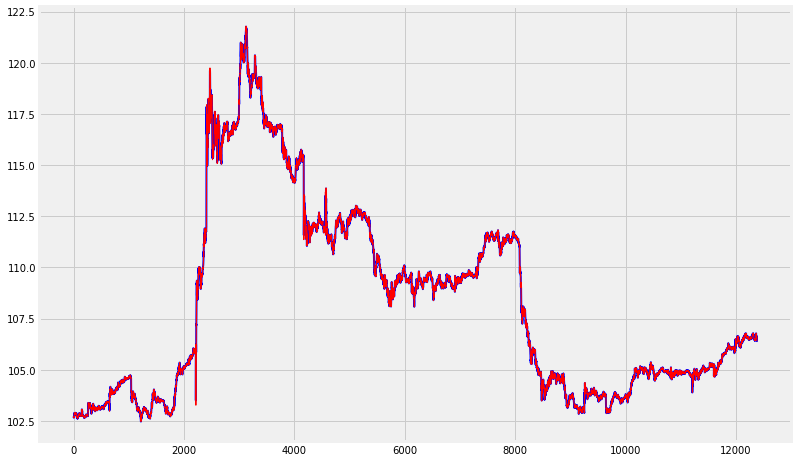

In [17]:
# Print the Mean squared error. 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# Print Root mean squared error.
print('Test RMSE: %.3f' % math.sqrt(error))
plt.figure(figsize=(12,8))
plt.plot(test, color='blue', linewidth=2)
plt.plot(predictions, color='red', linewidth=1)
plt.show()